In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv("credit_card.csv")


In [20]:
print("Data null:\n", credit.isnull().sum())
print("Data kosong:\n", credit.empty) 
print("Data NaN:\n", credit.isna().sum()) 

Data null:
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
Data kosong:
 False
Data NaN:
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [21]:
df_credit = credit.drop(["Customer Key", "Sl_No"], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

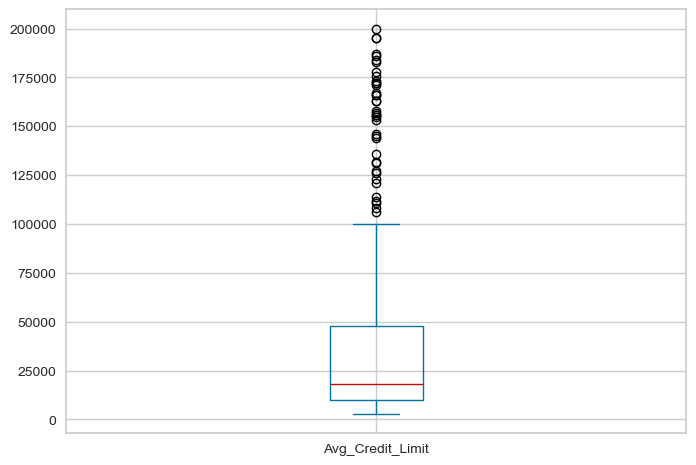

In [22]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

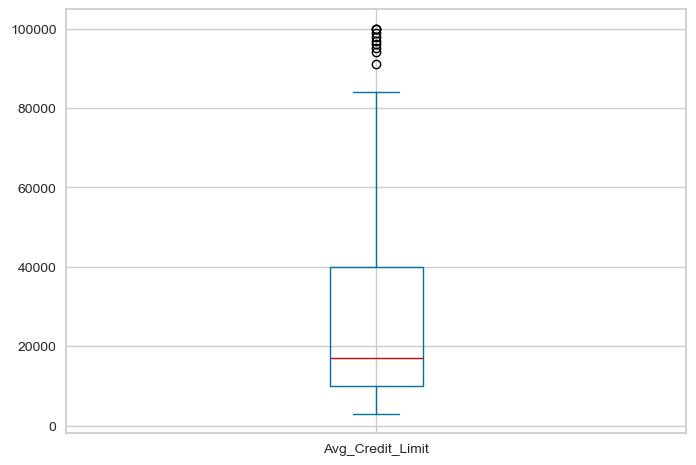

In [23]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    Q1 = data_frame[kolom_outlier].quantile(0.25)
    Q3 = data_frame[kolom_outlier].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    clean_data = data_frame[(data_frame[kolom_outlier] >= lower_bound) & (data_frame[kolom_outlier] <= upper_bound)]
    
    return clean_data

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

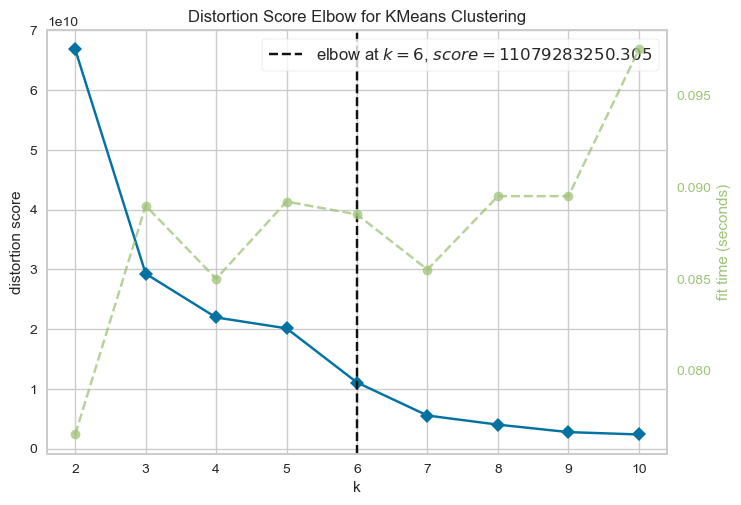

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.cluster import KMeans

kmeansC = KMeans(random_state=73)  # Perbaikan 'random_stated' menjadi 'random_state'
vis = KElbowVisualizer(kmeansC, k=(2, 11))

# xx diganti dengan 'data_bersih' yang merupakan data yang sudah bersih dari outlier
vis.fit(data_bersih)

# Menampilkan visualisasi elbow
vis.show()


Silhouette Score K-Means for 2 clusters: 0.7254150167909509
Silhouette Score K-Means for 3 clusters: 0.7058100919802311
Silhouette Score K-Means for 4 clusters: 0.5928895843252326
Silhouette Score K-Means for 5 clusters: 0.5432091138136126
Silhouette Score K-Means for 6 clusters: 0.5561748553700107
Silhouette Score K-Means for 7 clusters: 0.5988823996531906
Silhouette Score K-Means for 8 clusters: 0.5918608587737609
Silhouette Score K-Means for 9 clusters: 0.6074689966357256
Silhouette Score K-Means for 10 clusters: 0.598199872192169


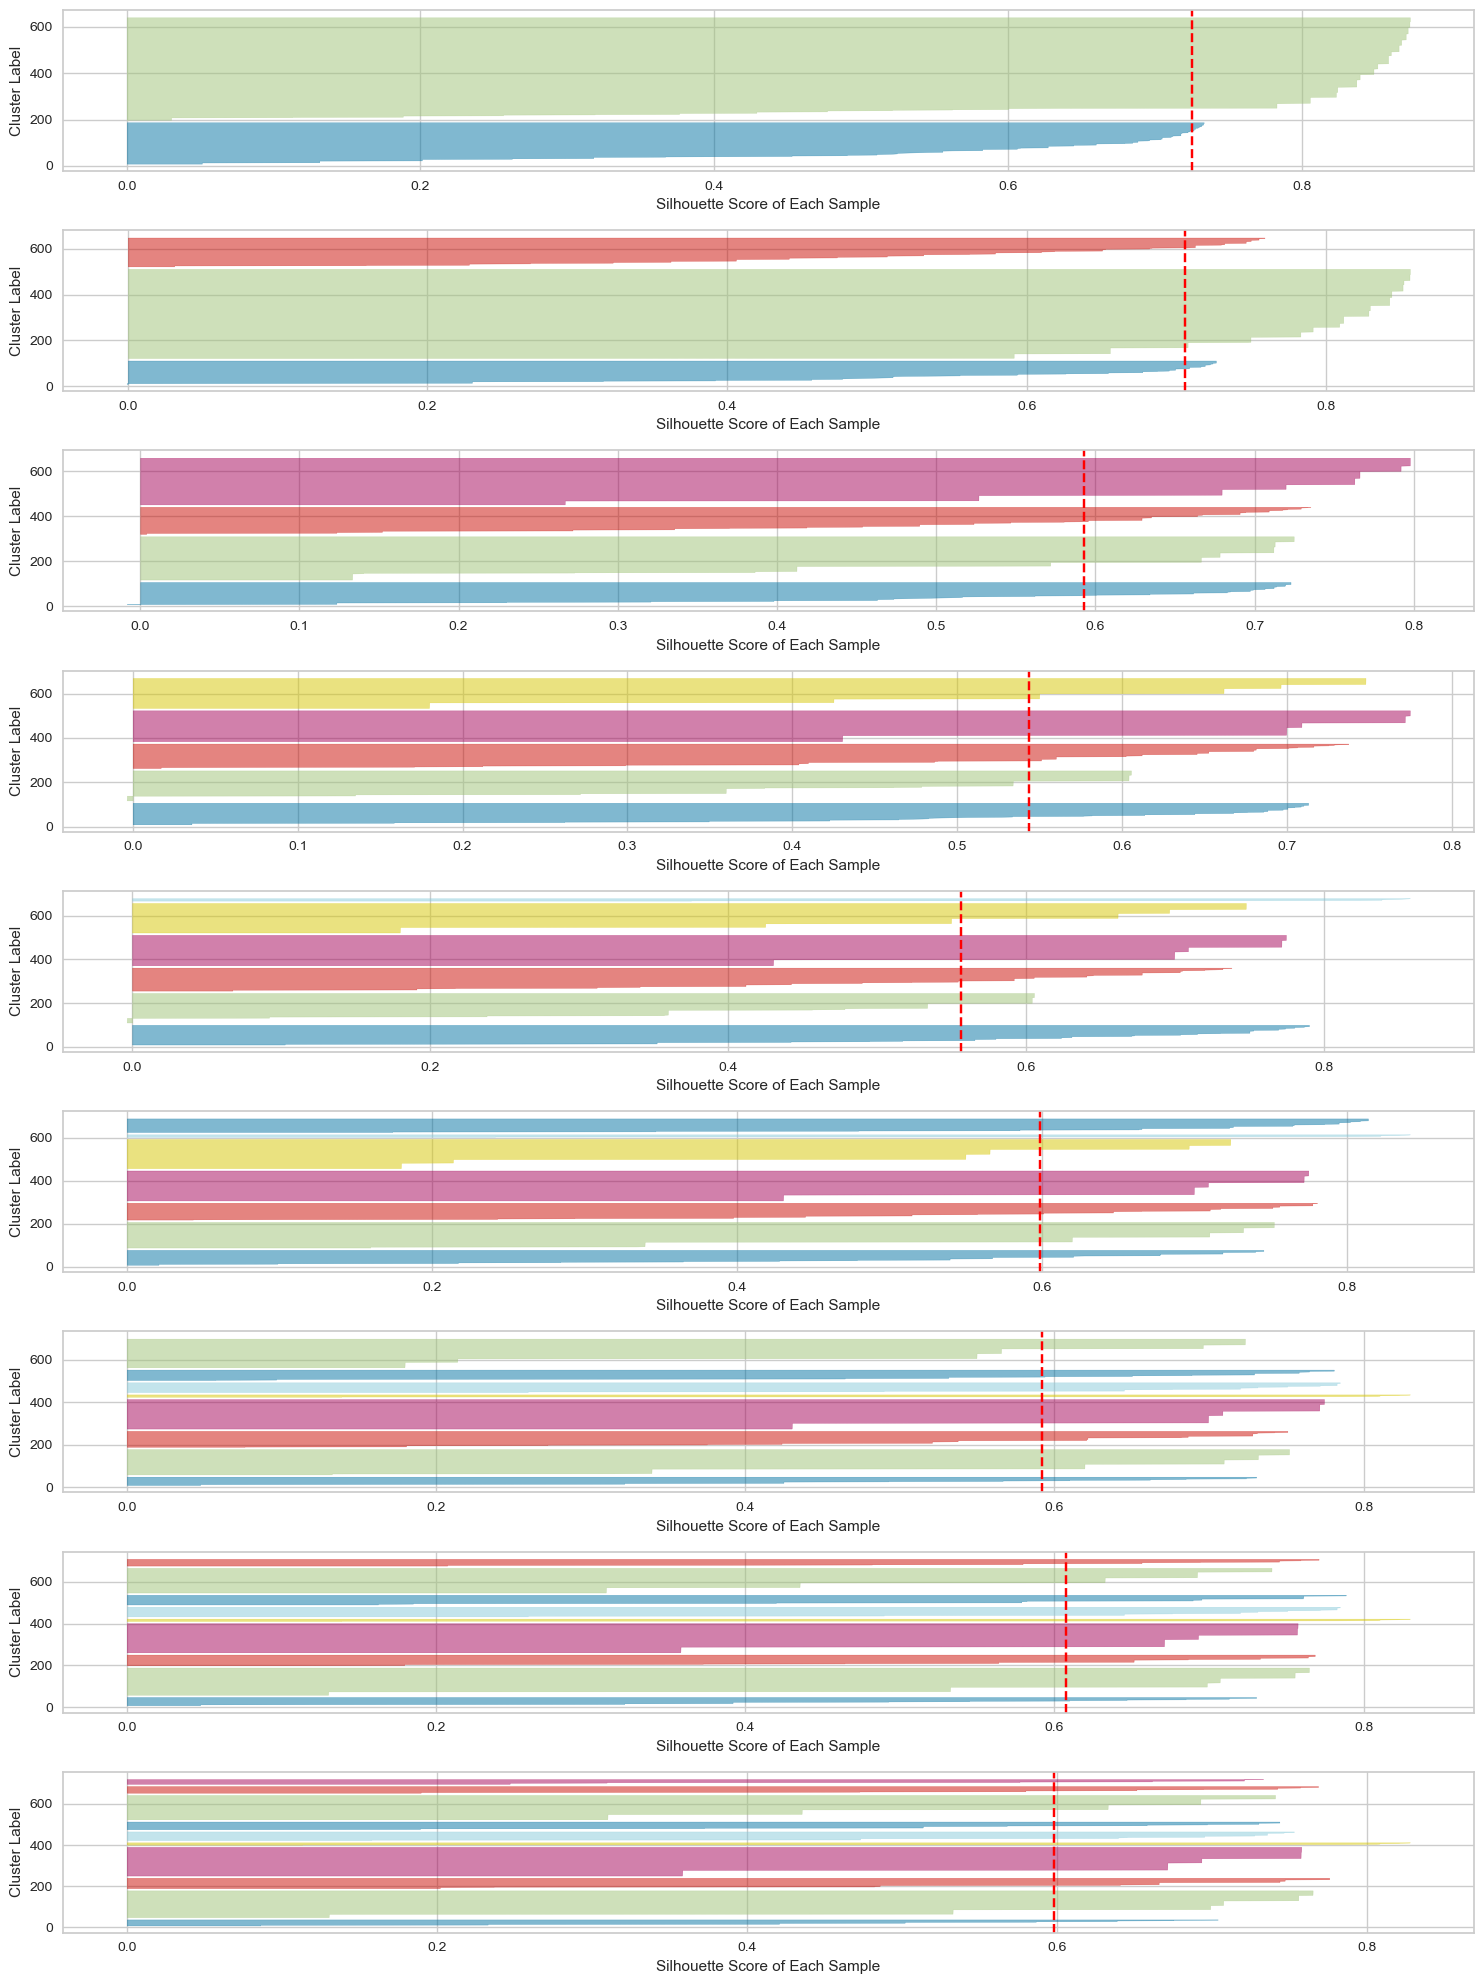

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

# Membuat subplot untuk menampilkan visualisasi silhouette
fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    # Membuat model KMeans dengan k clusters
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=73)
    
    # Melakukan clustering pada data yang sudah bersih dari outlier
    KM_clusters = kMeansC.fit_predict(data_bersih)  # Mengganti 'fot_predict' dengan 'fit_predict'
    
    # Menghitung dan mencetak Silhouette Score
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(data_bersih, KM_clusters))
    
    # Visualisasi silhouette score
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])  # Mengganti 'SilhoutteVisualizer' dengan 'SilhouetteVisualizer'
    sil_vis.fit(data_bersih)  # Memasukkan data bersih ke visualizer untuk dihitung dan divisualisasikan
    
    # Menambahkan label pada setiap plot silhouette
    ax[k-2].set(xlabel="Silhouette Score of Each Sample", ylabel="Cluster Label")

plt.tight_layout()
plt.show()


In [26]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

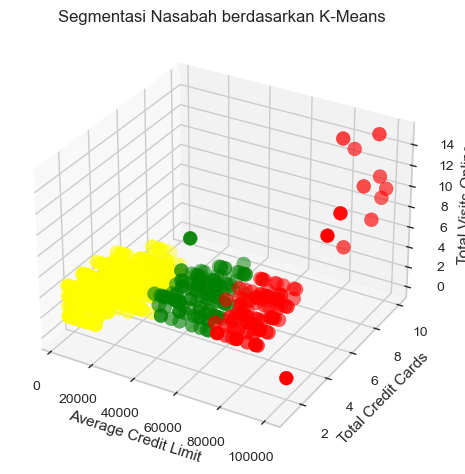

Silhouette score K-Means: 0.706


In [27]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=73)
K_clusters = kmeans.fit_predict(data_bersih)  # melakukan clustering pada data "xx" dan menyimpan hasil clustering

# Membuat grafik 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# Menentukan warna untuk masing-masing cluster
cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

# Plotting scatter 3D menggunakan warna yang telah ditentukan dengan ukuran titik 100
ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

# Menambahkan judul dan label sumbu
plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

# Menampilkan plot
plt.show()

# Menampilkan silhouette score
print("Silhouette score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))


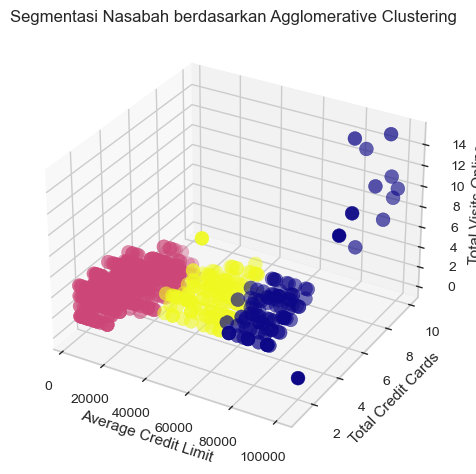

Silhouette Score Agglomerative Clustering: 0.705


In [28]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
            c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative Clustering')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score Agglomerative Clustering: %0.3f" % silhouette_score(data_bersih, AGG_clusters))


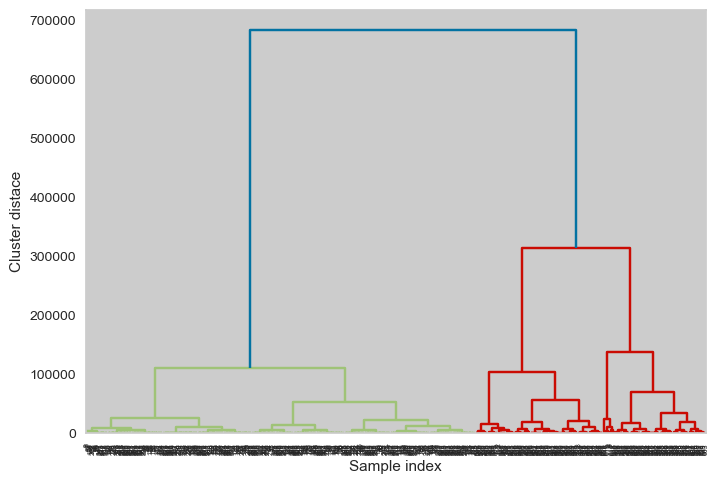

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distace")
plt.show()

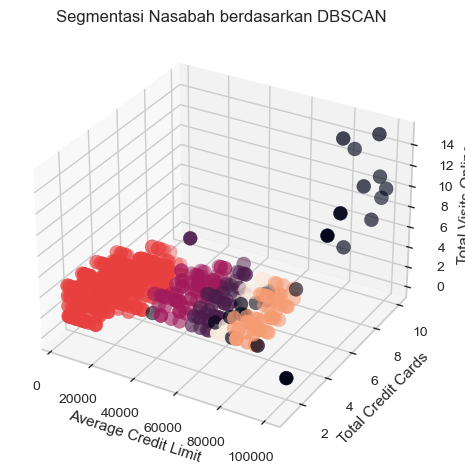

Silhouette Score DBSCAN: 0.657


In [30]:
DBSC = DBSCAN(min_samples=20, eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')

plt.show()

print("Silhouette Score DBSCAN: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))


In [31]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model Berhasil disimpan")

Model Berhasil disimpan
